# Time Series

## 1. Date and Time Data Types

- **Time series** is any dataset where **data** is **observed** or measured at many **points** in **time**.
- **Time points** usually occur at **regular intervals**, such as every minutes, every day, every month, every year.
- **Time series** is a very important form of **structured data** in many fields, such as finance and economics.
- **Pandas** provides many **built-in time series tools** to manipulate time series.
- **Date** and **time** data types are used as the **index** for **time series**.

In [1]:
from datetime import datetime

**datetime.now()**: To display the current time

In [3]:
time_now = datetime.now()
time_now

datetime.datetime(2022, 1, 28, 14, 0, 40, 370502)

In [4]:
time_now.year

2022

In [5]:
time_now.month

1

In [6]:
time_now.day

28

In [7]:
time_now.hour

14

We can do **arithmetic operations** with these data variables such as the difference. 

In [10]:
t1 = datetime(1988, 12, 23)
t2 = datetime.now()
time_diff = t2 - t1
time_diff

datetime.timedelta(days=12089, seconds=50697, microseconds=578490)

In [12]:
time_diff.days

12089

To **add** a **specific period**, we use the **module timedelta**.

In [13]:
from datetime import timedelta

In [14]:
t1 + timedelta(100)

datetime.datetime(1989, 4, 2, 0, 0)

In [15]:
t1 - timedelta(100)

datetime.datetime(1988, 9, 14, 0, 0)

## 2. Converting between String and Datetime

To prepare time series for analysis, the **dates** need to be **formatted** in **datetime data type**.

In [16]:
import pandas as pd

In [17]:
time_str = '1988, 12, 23'
time_str

'1988, 12, 23'

**datetime.strptime()**: To **convert** this **variable** into a **datetime object**

In [20]:
t1 = datetime.strptime(time_str, '%Y, %m, %d')
t1

datetime.datetime(1988, 12, 23, 0, 0)

In [23]:
time_str2 = '1988-12-23'
t2 = datetime.strptime(time_str2, '%Y-%m-%d')
t2

datetime.datetime(1988, 12, 23, 0, 0)

In [24]:
df = pd.read_csv('data/ex8.csv')
df.head()

,date,google,apple
0,30-Apr-21,2410.12,131.24
1,29-Apr-21,2429.89,133.25
2,28-Apr-21,2379.91,133.35
3,27-Apr-21,2307.12,134.16
4,26-Apr-21,2326.74,134.49


In [25]:
df.date

0    30-Apr-21
1    29-Apr-21
2    28-Apr-21
3    27-Apr-21
4    26-Apr-21
5    23-Apr-21
6    22-Apr-21
7    21-Apr-21
8    20-Apr-21
Name: date, dtype: object

In [26]:
df['date'].dtype

dtype('O')

**pd.to_datetime()**: To **convert** the 'date' column to **datetime**

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['date']

0   2021-04-30
1   2021-04-29
2   2021-04-28
3   2021-04-27
4   2021-04-26
5   2021-04-23
6   2021-04-22
7   2021-04-21
8   2021-04-20
Name: date, dtype: datetime64[ns]

In [29]:
df.head()

,date,google,apple
0,2021-04-30,2410.12,131.24
1,2021-04-29,2429.89,133.25
2,2021-04-28,2379.91,133.35
3,2021-04-27,2307.12,134.16
4,2021-04-26,2326.74,134.49


To display the **data type** of **all columns** in a **dataframe** we use the attribute **dtypes**

In [30]:
df.dtypes

date      datetime64[ns]
google           float64
apple            float64
dtype: object

## 3. Basics of Time Series

- **Time series** is a dataframe that is **indexed** with **timestamp**.
- **Timestamps** need to be recognized by **pandas** as **datetime objects**.

In [31]:
df = pd.read_csv('data/ex15.csv')
df.head()

,date,google,apple
0,30-Apr-19,2410.12,131.24
1,29-May-19,2429.89,133.25
2,28-Jun-19,2379.91,133.35
3,27-Jul-19,2307.12,134.16
4,26-Apr-20,2326.74,134.49


In [32]:
df.dtypes

date       object
google    float64
apple     float64
dtype: object

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [34]:
df.dtypes

date      datetime64[ns]
google           float64
apple            float64
dtype: object

In [35]:
df.head()

,date,google,apple
0,2019-04-30,2410.12,131.24
1,2019-05-29,2429.89,133.25
2,2019-06-28,2379.91,133.35
3,2019-07-27,2307.12,134.16
4,2020-04-26,2326.74,134.49


For **time series**, we set the **index** to be the **date column** using the function **set_index()**:

In [37]:
df = df.set_index('date')
df.head()

,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35
2019-07-27,2307.12,134.16
2020-04-26,2326.74,134.49


To **prepare** the **time series** datasets: 
- **Reading** the **time series** into **pandas** dataframe.
- **Converting** the **date** or **time column** into **datetime format**.
- **Setting** the **date** or **time column** to the **index**.

In practice, we combine these three steps in one statement.

In [38]:
df = pd.read_csv('data/ex15.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35
2019-07-27,2307.12,134.16
2020-04-26,2326.74,134.49


**parse_dates** argument automatically **convert** the **date column** into **datetime format**.

In **time series**, we can **select data** that belong to **specific year** using the function **loc [ ]**:

In [40]:
df.loc['2021']

,google,apple
date,,
2021-04-20,2293.63,132.88
2021-05-30,2410.12,131.24
2021-06-29,2429.89,133.25
2021-07-28,2379.91,133.35
2021-04-27,2307.12,134.16


In [41]:
df.loc['2021-4']

,google,apple
date,,
2021-04-20,2293.63,132.88
2021-04-27,2307.12,134.16


We can also **select data** in a **range of dates**, like this:

In [42]:
df.loc['2019':'2020']

/tmp/ipykernel_547/1276261247.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2019':'2020']


,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35
2019-07-27,2307.12,134.16
2020-04-26,2326.74,134.49
2020-05-23,2315.30,134.09
2020-06-24,2267.92,131.72
2020-07-20,2293.29,133.27


In [43]:
df.loc[:'2020']

,google,apple
date,,
2019-04-30,2410.12,131.24
2019-05-29,2429.89,133.25
2019-06-28,2379.91,133.35
2019-07-27,2307.12,134.16
2020-04-26,2326.74,134.49
2020-05-23,2315.30,134.09
2020-06-24,2267.92,131.72
2020-07-20,2293.29,133.27


To **check** for **duplicate index dates**, we use the attribute **is_unique** for the index like this:

In [44]:
df.index.is_unique

True

## 4. Generating Date Ranges

In [45]:
df = pd.read_csv('data/ex16.csv')
df

,google,apple
0,2410.12,131.24
1,2429.89,133.25
2,2379.91,133.35
3,2307.12,134.16
4,2326.74,134.49
5,2315.30,134.09
6,2267.92,131.72
7,2293.29,133.27
8,2293.63,132.88
9,2410.12,131.24


This time series has no date index, we can **generate** a **date index** for any **specific period of time** using the function **pd.date_range()**:

In [46]:
index = pd.date_range(start='2020-05-01', end='2020-05-15')
index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', freq='D')

In [48]:
TS = df.set_index(index)
TS

,google,apple
2020-05-01,2410.12,131.24
2020-05-02,2429.89,133.25
2020-05-03,2379.91,133.35
2020-05-04,2307.12,134.16
2020-05-05,2326.74,134.49
2020-05-06,2315.30,134.09
2020-05-07,2267.92,131.72
2020-05-08,2293.29,133.27
2020-05-09,2293.63,132.88
2020-05-10,2410.12,131.24


We can also **generate date index** by specifying a **start date** and the **number of periods**, like this:

In [49]:
index2 = pd.date_range(start='2020-05-01', periods=15)
index2

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15'],
              dtype='datetime64[ns]', freq='D')

**By default** the function **date_range()** generates **daily periods**, but we can generate any **frequency**, for example by adding the argument **freq = 'BM'** we can generate frequency as the **last business day of the month**:

In [50]:
index_last = pd.date_range('2020-01-01', '2020-12-31', freq = 'BM')
index_last

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='BM')

By adding the argument **freq = 'B'** , we can generate **frequency** as the **business days**:

In [51]:
index_BD = pd.date_range('2020-01-01', '2020-1-31', freq = 'B')
index_BD

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='B')

By adding the argument **freq = '4h'** , we can generate **frequency** as **four-hour periods**:

In [52]:
index_4h = pd.date_range('2020-01-01', '2020-1-02', freq = '4h')
index_4h

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 04:00:00',
               '2020-01-01 08:00:00', '2020-01-01 12:00:00',
               '2020-01-01 16:00:00', '2020-01-01 20:00:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

By adding the argument **freq = '1h30min'** , we can generate **frequenc**y as **one hour and a half periods**:

In [53]:
index_1h30 = pd.date_range('2020-01-01', '2020-1-02', freq = '1h30min')
index_1h30

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:30:00',
               '2020-01-01 03:00:00', '2020-01-01 04:30:00',
               '2020-01-01 06:00:00', '2020-01-01 07:30:00',
               '2020-01-01 09:00:00', '2020-01-01 10:30:00',
               '2020-01-01 12:00:00', '2020-01-01 13:30:00',
               '2020-01-01 15:00:00', '2020-01-01 16:30:00',
               '2020-01-01 18:00:00', '2020-01-01 19:30:00',
               '2020-01-01 21:00:00', '2020-01-01 22:30:00',
               '2020-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

Another example by adding the argument **freq = 'WOM-3FRI'** , we can generate a **frequency** with the **third Friday for each month**:

In [54]:
index_3fri = pd.date_range('2021-01-01', '2021-12-31', freq = 'WOM-3FRI')
index_3fri

DatetimeIndex(['2021-01-15', '2021-02-19', '2021-03-19', '2021-04-16',
               '2021-05-21', '2021-06-18', '2021-07-16', '2021-08-20',
               '2021-09-17', '2021-10-15', '2021-11-19', '2021-12-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 5. Shifting Data through Time (Lagging and Leading)

- **Data shifting** refers to **moving data backward** and **forward** through time while leaving the **date index unchanged**.
- Shifting data **backward** is called **lagging**.
- Shifting data **forward** is called **leading**.
- **Shifting data** in **time series** introduces **missing values**.
- When shifting **backward**, the missing values will be at the **start** of the time series.
- When shifting **forward**, the missing values will be at the **end** of the time series.

In [55]:
df = pd.read_csv('data/ex17.csv', index_col = 'date', parse_dates = True)
df

,apple
date,
2019-04-01,131.24
2019-04-02,133.25
2019-04-03,133.35
2019-04-04,134.16
2019-04-05,134.49
2019-04-06,134.09
2019-04-07,131.72
2019-04-08,133.27
2019-04-09,132.88


We convert **all date columns** to **datatime format** using the argument **parse_dates = True**

We can **shift** the price **one day backward** by using the function **shift()**:

In [57]:
df.shift(periods=2)

,apple
date,
2019-04-01,NaN
2019-04-02,NaN
2019-04-03,131.24
2019-04-04,133.25
2019-04-05,133.35
2019-04-06,134.16
2019-04-07,134.49
2019-04-08,134.09
2019-04-09,131.72


We can make a **forward shift** by using **minus** for the **periods**. Here we use (-1) to shift the data one day forward:

In [58]:
df.shift(-1)

,apple
date,
2019-04-01,133.25
2019-04-02,133.35
2019-04-03,134.16
2019-04-04,134.49
2019-04-05,134.09
2019-04-06,131.72
2019-04-07,133.27
2019-04-08,132.88
2019-04-09,131.24


In [59]:
df['lag1'] = df['apple'].shift(1)
df

,apple,lag1
date,,
2019-04-01,131.24,NaN
2019-04-02,133.25,131.24
2019-04-03,133.35,133.25
2019-04-04,134.16,133.35
2019-04-05,134.49,134.16
2019-04-06,134.09,134.49
2019-04-07,131.72,134.09
2019-04-08,133.27,131.72
2019-04-09,132.88,133.27


**Shifting data** in time series generates **missing values**, we can **delete** these missing values using the function **dropna()**, and to make the **changes** reflected in the **original times series** we use the argument **inplace = True**:

In [61]:
df.dropna(inplace=True)
df

,apple,lag1
date,,
2019-04-02,133.25,131.24
2019-04-03,133.35,133.25
2019-04-04,134.16,133.35
2019-04-05,134.49,134.16
2019-04-06,134.09,134.49
2019-04-07,131.72,134.09
2019-04-08,133.27,131.72
2019-04-09,132.88,133.27
2019-04-10,131.24,132.88


In [64]:
df['percent_change'] = (df['apple'] / df['apple'].shift(1)) - 1
df

,apple,lag1,percent_change
date,,,
2019-04-02,133.25,131.24,NaN
2019-04-03,133.35,133.25,0.000750
2019-04-04,134.16,133.35,0.006074
2019-04-05,134.49,134.16,0.002460
2019-04-06,134.09,134.49,-0.002974
2019-04-07,131.72,134.09,-0.017675
2019-04-08,133.27,131.72,0.011767
2019-04-09,132.88,133.27,-0.002926
2019-04-10,131.24,132.88,-0.012342


## 6. Handling Time Zone

- **Date** and **time** data are essential for **time series**.
- Often the **collection** of time series data is related to **regions**.
- It is essential to be able to **identify the time zone**.
- To be able to **convert** between **time zones**.

Here we import the **pytz** library in **python** that handles **time zones**:

In [65]:
import pytz

We can **display** the **common time zones** in python using an attribute called **common_timezones**:

In [66]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [67]:
date_index = pd.date_range('2021-07-01 13:30', periods = 10, freq = 'H')
date_index

DatetimeIndex(['2021-07-01 13:30:00', '2021-07-01 14:30:00',
               '2021-07-01 15:30:00', '2021-07-01 16:30:00',
               '2021-07-01 17:30:00', '2021-07-01 18:30:00',
               '2021-07-01 19:30:00', '2021-07-01 20:30:00',
               '2021-07-01 21:30:00', '2021-07-01 22:30:00'],
              dtype='datetime64[ns]', freq='H')

To **display** the **time zone** for this data index we use the attribute ( **tz** ):

In [69]:
print(date_index.tz)

None


We can **create** a datetime index with a **specific time zone** by using the argument **tz**. For example we can assign ‘UTC’ time zone to this datetime index using the argument tz = 'UTC':

In [70]:
date_index = pd.date_range('2021-07-01 13:30', periods = 10, freq = 'H', tz='UTC')
date_index

DatetimeIndex(['2021-07-01 13:30:00+00:00', '2021-07-01 14:30:00+00:00',
               '2021-07-01 15:30:00+00:00', '2021-07-01 16:30:00+00:00',
               '2021-07-01 17:30:00+00:00', '2021-07-01 18:30:00+00:00',
               '2021-07-01 19:30:00+00:00', '2021-07-01 20:30:00+00:00',
               '2021-07-01 21:30:00+00:00', '2021-07-01 22:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [71]:
df = pd.read_csv('data/ex18.csv', index_col = 'time', parse_dates = True)
df

,amount
time,
2022-01-28 00:00:00,100
2022-01-28 01:00:00,104
2022-01-28 02:00:00,108
2022-01-28 03:00:00,113
2022-01-28 04:00:00,117
2022-01-28 05:00:00,121
2022-01-28 06:00:00,125
2022-01-28 07:00:00,129
2022-01-28 08:00:00,133


In [73]:
print(df.index.tz)

None


To **assign** a **time zone** to this **time series index** using a function called **tz_localize()**:

In [74]:
df_utc = df.tz_localize('UTC')
df_utc

,amount
time,
2022-01-28 00:00:00+00:00,100
2022-01-28 01:00:00+00:00,104
2022-01-28 02:00:00+00:00,108
2022-01-28 03:00:00+00:00,113
2022-01-28 04:00:00+00:00,117
2022-01-28 05:00:00+00:00,121
2022-01-28 06:00:00+00:00,125
2022-01-28 07:00:00+00:00,129
2022-01-28 08:00:00+00:00,133


We can **convert** an existing **time zone** to another time zone using the function **tz_convert()**:

In [76]:
df_utc.tz_convert('Europe/Berlin')

,amount
time,
2022-01-28 01:00:00+01:00,100
2022-01-28 02:00:00+01:00,104
2022-01-28 03:00:00+01:00,108
2022-01-28 04:00:00+01:00,113
2022-01-28 05:00:00+01:00,117
2022-01-28 06:00:00+01:00,121
2022-01-28 07:00:00+01:00,125
2022-01-28 08:00:00+01:00,129
2022-01-28 09:00:00+01:00,133


## 7. Resampling and Frequency Conversion

- **Resampling** means **converting** the **index** from one **date frequency** to another one.
- An example of **resampling** is **aggregating lower frequency data** (daily data) to **higher frequency data** (monthly data). 
- We can perform **resampling** in **pandas** using method called **resample()**.

In [77]:
df = pd.read_csv('data/apple.csv', index_col = 'Date', parse_dates = True)
df.head()

,Close
Date,
2021-01-04,129.4
2021-01-05,131.0
2021-01-06,126.6
2021-01-07,130.9
2021-01-08,132.1


We can **resample** this time series into the **weekly average prices** using the function **resample('W')**:

In [80]:
df.resample('W').mean()

,Close
Date,
2021-01-10,130.000
2021-01-17,128.940
2021-01-24,133.950
2021-01-31,139.460
2021-02-07,135.440
2021-02-14,135.760
2021-02-21,130.900
2021-02-28,123.920
2021-03-07,123.300


In [81]:
df.resample('M').mean()

,Close
Date,
2021-01-31,133.042105
2021-02-28,131.536842
2021-03-31,121.878261
2021-04-30,131.809524
2021-05-31,126.795000
2021-06-30,129.963636
2021-07-31,137.300000


Note that **pandas** uses the **last day** of the **month** as the **index** of the **monthly data**. Usually, we **don't want** to include the day in the index of the monthly data. For a monthly frequency we can display only the month without the days using the argument **kind = 'period'**:

In [84]:
df.resample('M', kind='period').mean()

,Close
Date,
2021-01,133.042105
2021-02,131.536842
2021-03,121.878261
2021-04,131.809524
2021-05,126.795000
2021-06,129.963636
2021-07,137.300000


In [85]:
sales = pd.read_csv('data/sales.csv', index_col = 'Date', parse_dates = True)
sales.head()

,Sales
Date,
2021-06-30,370
2021-06-29,363
2021-06-28,348
2021-06-25,331
2021-06-24,334


In [86]:
sales.resample('M', kind='period').sum()

,Sales
Date,
2020-07,1012
2020-08,3633
2020-09,3176
2020-10,3613
2020-11,3366
2020-12,6006
2021-01,6278
2021-02,5992
2021-03,5032


## 8. Rolling and Moving Windows

**Rolling** is like having a **window sliding** over your **time series** data and **extracting** out every **data** you can see through this **window**.

Why we use **rolling** in **time series**?
- Rolling is used in time series analysis to check for its **stability over time**.
- Rolling is also used to explore the **main trend of the data**.

In [88]:
df = pd.read_csv('data/apple.csv', index_col = 'Date', parse_dates = True)
df.head()

,Close
Date,
2021-01-04,129.4
2021-01-05,131.0
2021-01-06,126.6
2021-01-07,130.9
2021-01-08,132.1


<AxesSubplot:xlabel='Date'>

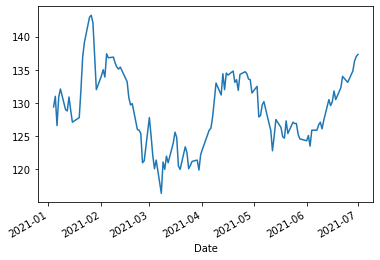

In [90]:
df['Close'].plot()

We can apply **rolling** for the close price column using the function **rolling()** with roling window equals three:

In [91]:
df.rolling(window=3).mean()

,Close
Date,
2021-01-04,NaN
2021-01-05,NaN
2021-01-06,129.000000
2021-01-07,129.500000
2021-01-08,129.866667
...,...
2021-06-25,133.400000
2021-06-28,133.766667
2021-06-29,134.733333


<AxesSubplot:xlabel='Date'>

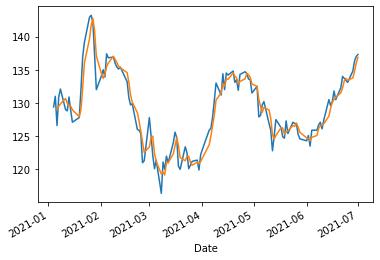

In [94]:
df['Close'].plot()
df['Close'].rolling(window=3).mean().plot()

<AxesSubplot:xlabel='Date'>

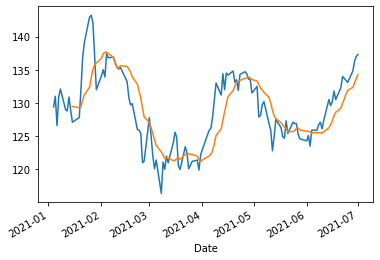

In [95]:
df['Close'].plot()
df['Close'].rolling(window=10).mean().plot()

In [96]:
df = pd.read_csv('data/AirPassenger.csv', index_col = 'Month', parse_dates = True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

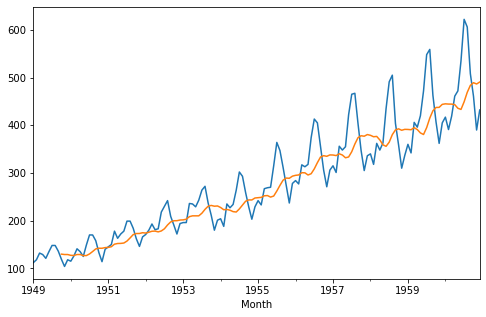

In [99]:
df['Passengers'].plot(figsize=(8, 5))
df['Passengers'].rolling(window=10).mean().plot()